<a href="https://colab.research.google.com/github/seodalzzz/Machine_Learning_implementation/blob/main/PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import seaborn as sns

In [ ]:
# MNIST, CIFAR10, CIFAR100
trainset = torchvision.datasets.MNIST(root='./datasets/', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.MNIST(root='./datasets/', train=False,
                                       download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 172037900.43it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 13272235.55it/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38510406.75it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11305951.79it/s]


Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=60000,
                                          shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                         shuffle=False)

In [ ]:
dataiter = iter(trainloader)
tr_images, tr_labels = next(iter(dataiter))
tr_images, tr_labels = tr_images.numpy(), tr_labels.numpy()
tr_images, tr_labels = tr_images.reshape(len(tr_images),-1), tr_labels.reshape(len(tr_labels),-1)

In [ ]:
dataiter = iter(testloader)
te_images, te_labels = next(iter(dataiter))
te_images, te_labels = te_images.numpy(), te_labels.numpy()
te_images, te_labels = te_images.reshape(len(te_images),-1), te_labels.reshape(len(te_labels),-1)

In [ ]:
class PCA():
    def __init__(self, num_components):
        print("PCA initialized..")

        self.k=num_components
        self.meanvec=np.zeros(1000)
        self.V=np.zeros((1000,1000))

    def fit(self, X):
        self.meanvec=X.mean(axis=0)
        Xc=X-self.meanvec
        Sigma=np.cov(Xc, rowvar=False)

        Q=np.zeros((Sigma.shape[0],Sigma.shape[0]))
        eigenvalues, Q =np.linalg.eig(Sigma)

        ## use top-K eigen vector
        arg_idx=eigenvalues.argsort()[::-1]
        arg_idx_topk=arg_idx[:self.k]
        self.V=Q[:,arg_idx_topk]

        X_reduced=np.dot(Xc,self.V)
        return X_reduced

    def fit_transform(self, X):

        Xc=X
        Xc=X-self.meanvec
        X_reduced=np.dot(Xc,self.V)
        return X_reduced

    def reconstruct(self, X_reduced):

        X_reconstruction=np.dot(X_reduced,self.V.T)+self.meanvec
        return X_reconstruction

In [ ]:
model = PCA(num_components=2)

PCA initialized..


In [ ]:
tr_images_reduced = model.fit(tr_images)
tr_reconstruction_error = np.mean((model.reconstruct(tr_images_reduced)-tr_images)**2)
tr = np.hstack([tr_images_reduced,tr_labels])
print(tr_reconstruction_error)

0.055952703656788484


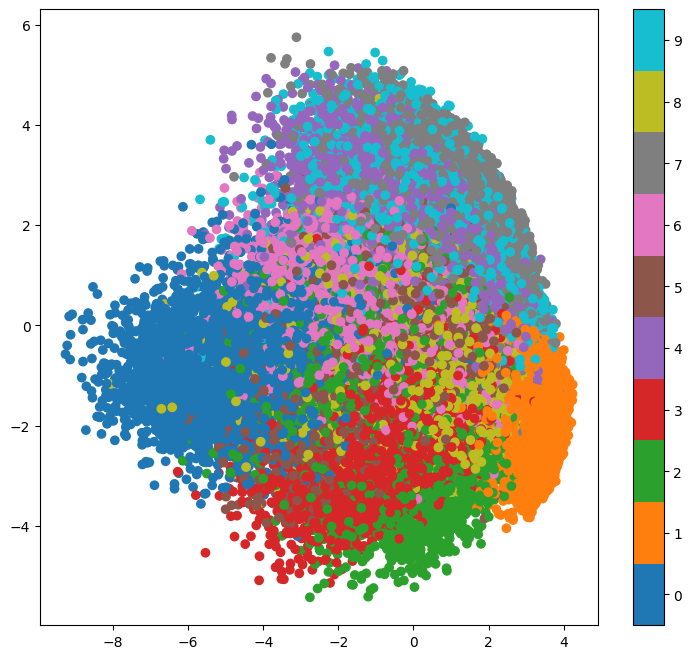

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

colors = ListedColormap(sns.color_palette())

plt.figure(figsize=(9,8))

plt.scatter(tr[:,0],tr[:,1],c=tr[:,2],cmap=colors)
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9])
plt.clim(-.5,9.5)

plt.show()

In [ ]:
te_images_reduced = model.fit_transform(te_images)
te_reconstruction_error = np.mean((model.reconstruct(te_images_reduced)-te_images)**2)
te = np.hstack([te_images_reduced,te_labels])
print(te_reconstruction_error)

0.05566946623474575


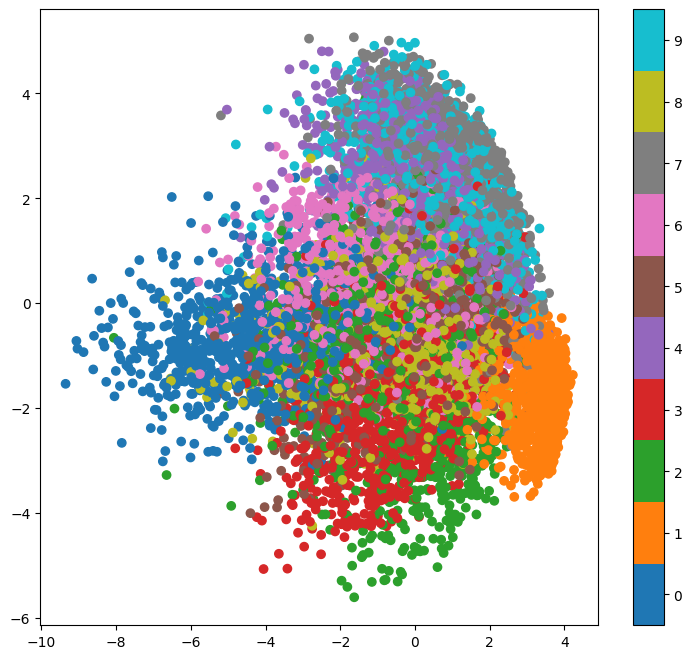

In [ ]:
plt.figure(figsize=(9,8))

plt.scatter(te[:,0],te[:,1],c=te[:,2],cmap=colors)
plt.colorbar(ticks=[0,1,2,3,4,5,6,7,8,9])
plt.clim(-.5,9.5)

plt.show()